<h1>PRUEBA PRÁCTICA</h1>
<h3>YOUNG PROFESSIONAL DATA</h3> <b>Andrea Carolina Sánchez Valdés</b>

<h3>DATA SCIENCE METODOLOGY</h3>
Para el desarrollo de la prueba se seguirá el ciclo de la metodologia de data science indicado en la imagen

<img src = "http://www.ibmbigdatahub.com/sites/default/files/figure01_revised.jpg">

<b>1. Business Understanding</b>

Se requiere identificar patrones o correlaciones entre variables

<b>2. Analytic Approach</b>

El tipo de pregunta define el tipo de tratamiento para el problema, en este caso se requiere 
descubrir relaciones entre variables, por lo tanto se puede usar un modelo descriptivo.

<b>4. Data Requirements</b>

Para respoder o solucionar el problema se necesitan datos de los clientes que describan su comportamiento

<b>4. Data Collection</b>

Identificar las fuentes de datos y como se obtuvieron

In [1]:
#Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
from datetime import date

In [2]:
#Leer datos BASE_ID.txt
id_path=("C://Users/hecansaga/Desktop/YPD/BASE_ID.txt")
df_id = pd.read_table(id_path)
df_id.head()

,CLIENTE_CC,FECHA_ALTA,FECHA_NACIMIENTO,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,fuga,MES_DE_FUGA
0,"1,00",sep301996,19300823,F,CASADO,otros,1.0,2.0
1,"2,00",may011986,19530630,HOMBRE,UNION LIBRE,Contrato fijo,NaN,NaN
2,"3,00",dic011994,19540721,F,UNION LIBRE,OTROS,1.0,11.0
3,"4,00",ago271997,19390503,M,CASADO,OTROS,NaN,NaN
4,"5,00",jul211997,19311013,F,CASADO,contrato autonomo.,NaN,NaN


In [3]:
#Leer datos BASE_MOVIMIENTOS.txt
bm_path=("C://Users/hecansaga/Desktop/YPD/BASE_MOVIMIENTOS.txt")                   
df_bm = pd.read_fwf(bm_path)
df_bm.head()

,ID,FECHA_INFORMACION,SALDO_AHORROS,SALDO_FONDOS,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,MONTO_ABONOS_NOMINA,INDICADOR_MORA,SALDO_ACTIVO,SALDO_PASIVO
0,3,01JUL2017:00:00:00,3340.00,"0,00","$ 876.047,06","$ 0,00",0.0,0.0,0.0,0.0,0.0,0.0,0,"876047,06",3340
1,171,01MAY2017:00:00:00,1070130.00,"0,00","$ 7.828.500,12","$ 0,00",0.0,0.0,0.0,0.0,460000.0,897220.0,0,"7828500,12","1070133,18"
2,313,01OCT2017:00:00:00,0.00,"0,00","$ 0,00","$ 0,00",0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,644,01MAY2017:00:00:00,2204.88,"0,00","$ 8.863.156,75","$ 0,00",2153170.0,359023.0,0.0,8000.0,160000.0,748000.0,0,"11016329,89","2204,88"
4,1445,01DEC2016:00:00:00,692926.00,"0,00","$ 0,00","$ 0,00",0.0,0.0,0.0,0.0,0.0,606720.0,0,0,"692926,32"


<b>5. Data Understanding</b>

Identificar las fuentes de datos y como se obtuvieron

In [4]:
#Tipos de variables en la base de movimientos
df_bm.dtypes

ID                       int64
FECHA_INFORMACION       object
SALDO_AHORROS          float64
SALDO_FONDOS            object
SALDO_CREDITO1          object
SALDO_CREDITO2          object
SALDO_TARJETA          float64
MONTO_COMPRAS1         float64
MONTO_CAJERO1          float64
MONTO_COMPRAS2         float64
MONTO_CAJERO2          float64
MONTO_ABONOS_NOMINA    float64
INDICADOR_MORA           int64
SALDO_ACTIVO            object
SALDO_PASIVO            object
dtype: object

In [5]:
#Tipos de variables en la base id
df_id.dtypes

CLIENTE_CC            object
FECHA_ALTA            object
FECHA_NACIMIENTO      object
SEXO                  object
ESTADO_CIVIL          object
SITUACION_LABORAL     object
fuga                 float64
MES_DE_FUGA          float64
dtype: object

<b>6. Data Preparation</b>

Transformar y limpiar los datos

In [6]:
#Correción y limpieza de datos
df_bm.replace(regex=True,inplace=True,to_replace=r'\$ ',value=r'') 
df_bm.replace(regex=True,inplace=True,to_replace=r'\.',value=r'')
df_bm.replace(regex=True,inplace=True,to_replace=r'\,',value=r'.')

In [7]:
#Configurar correctamente los tipos de variables de la base de movimientos
df_bm['SALDO_FONDOS']=df_bm['SALDO_FONDOS'].astype("float64")
df_bm['SALDO_CREDITO1']=df_bm['SALDO_CREDITO1'].astype("float64")
df_bm['SALDO_CREDITO2']=df_bm['SALDO_CREDITO2'].astype("float64")
df_bm['SALDO_ACTIVO']=df_bm['SALDO_ACTIVO'].astype("float64")
df_bm['SALDO_PASIVO']=df_bm['SALDO_PASIVO'].astype("float64")

In [8]:
#verificar los nuevos tipos de variables
df_bm.dtypes

ID                       int64
FECHA_INFORMACION       object
SALDO_AHORROS          float64
SALDO_FONDOS           float64
SALDO_CREDITO1         float64
SALDO_CREDITO2         float64
SALDO_TARJETA          float64
MONTO_COMPRAS1         float64
MONTO_CAJERO1          float64
MONTO_COMPRAS2         float64
MONTO_CAJERO2          float64
MONTO_ABONOS_NOMINA    float64
INDICADOR_MORA           int64
SALDO_ACTIVO           float64
SALDO_PASIVO           float64
dtype: object

In [9]:
#eliminar las datos de horas en la variable FECHA_INFORMACION
df_bm['FECHA_INFORMACION'].replace(regex=True,inplace=True,to_replace=r'\:00',value=r'')

In [10]:
#Reemplazar valores de meses en letras por números en FECHA INFORMACION
df_bm['FECHA_INFORMACION'].replace(regex=True,inplace=True,
                                   to_replace=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'],
                                   value=['/01/','/02/','/03/','/04/','/05/','/06/','/07/','/08/','/09/','/10/','/11/','/12/'])

In [11]:
#Convertir la variable FECHA INFORMACION  a tipo fecha
df_bm['FECHA_INFORMACION']=pd.to_datetime(df_bm['FECHA_INFORMACION'])

In [12]:
#Medidas estadisticas básicas para identificar los cambios en las variables
df_bm.describe()

,ID,SALDO_AHORROS,SALDO_FONDOS,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,MONTO_ABONOS_NOMINA,INDICADOR_MORA,SALDO_ACTIVO,SALDO_PASIVO
count,31440.000000,3.144000e+04,3.144000e+04,3.144000e+04,3.144000e+04,3.144000e+04,3.144000e+04,3.144000e+04,3.144000e+04,3.144000e+04,3.144000e+04,31440.000000,3.144000e+04,3.144000e+04
mean,1245.013581,6.145143e+05,1.011476e+05,2.125163e+06,2.038797e+05,6.082164e+05,5.245179e+04,2.005084e+04,6.154962e+04,6.121321e+05,6.981118e+05,0.014377,2.937260e+06,7.315603e+05
std,719.758159,1.632780e+06,7.283073e+05,4.445635e+06,1.442148e+06,1.656331e+06,3.796909e+05,1.634780e+05,2.915263e+05,9.684137e+05,1.011727e+06,0.119039,4.840862e+06,1.785686e+06
min,1.000000,-1.738720e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,-1.225200e+02
25%,622.000000,3.425000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,8.720000e+02
50%,1244.000000,7.545170e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,9.436170e+04
75%,1866.000000,4.480658e+05,0.000000e+00,1.342990e+06,0.000000e+00,1.914562e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.050000e+06,1.202605e+06,0.000000,4.184343e+06,5.413268e+05
max,2500.000000,9.329870e+07,9.780793e+06,6.700000e+07,1.756400e+07,2.075380e+07,1.449950e+07,8.990000e+06,1.077210e+07,1.888000e+07,2.800310e+07,1.000000,6.965860e+07,9.329867e+07


In [13]:
#Observar la estructura de los datos corregidos de la base de movimientos
df_bm.head()

,ID,FECHA_INFORMACION,SALDO_AHORROS,SALDO_FONDOS,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,MONTO_ABONOS_NOMINA,INDICADOR_MORA,SALDO_ACTIVO,SALDO_PASIVO
0,3,2017-01-07,3340.00,0.0,876047.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,876047.06,3340.00
1,171,2017-01-05,1070130.00,0.0,7828500.12,0.0,0.0,0.0,0.0,0.0,460000.0,897220.0,0,7828500.12,1070133.18
2,313,2017-01-10,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.00
3,644,2017-01-05,2204.88,0.0,8863156.75,0.0,2153170.0,359023.0,0.0,8000.0,160000.0,748000.0,0,11016329.89,2204.88
4,1445,2016-01-12,692926.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,606720.0,0,0.00,692926.32


In [14]:
#Observar la estructura de los datos corregidos de la base id
df_id.head()

,CLIENTE_CC,FECHA_ALTA,FECHA_NACIMIENTO,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,fuga,MES_DE_FUGA
0,"1,00",sep301996,19300823,F,CASADO,otros,1.0,2.0
1,"2,00",may011986,19530630,HOMBRE,UNION LIBRE,Contrato fijo,NaN,NaN
2,"3,00",dic011994,19540721,F,UNION LIBRE,OTROS,1.0,11.0
3,"4,00",ago271997,19390503,M,CASADO,OTROS,NaN,NaN
4,"5,00",jul211997,19311013,F,CASADO,contrato autonomo.,NaN,NaN


In [15]:
#Renombrar columna fuga por FUGA y CLIENTE CC por ID
df_id.rename(columns={'fuga':'FUGA','CLIENTE_CC':'ID'},inplace=True)

In [16]:
#Correción y limpieza de datos
df_id.replace(regex=True,inplace=True,to_replace=r'\$ ',value=r'') 
df_id.replace(regex=True,inplace=True,to_replace=r'\.',value=r'')
df_id.replace(regex=True,inplace=True,to_replace=r'\,',value=r'.')

In [17]:
#Reemplazar los datos NaN por 0s en las variables FUGA y MES DE FUGA
df_id['FUGA']=df_id['FUGA'].fillna(0)
df_id['MES_DE_FUGA']=df_id['MES_DE_FUGA'].fillna(0)

In [18]:
#Identificar valores unicos en la variable SEXO
df_id['SEXO'].unique()

array(['F', 'HOMBRE', 'M', 'Hombre', 'mujer', 'femenino', 'masculino',
       'FEMENINO', 'Mujer', 'varón', 'Masc', 'MUJER'], dtype=object)

In [19]:
#Unificar los valores en la variable SEXO
df_id['SEXO'].replace(inplace=True,to_replace=['F', 'HOMBRE', 'M', 'Hombre', 'mujer', 'femenino', 'masculino',
       'FEMENINO', 'Mujer', 'varón', 'Masc', 'MUJER'],
                      value=['FEMENINO', 'MASCULINO', 'MASCULINO', 'MASCULINO', 'FEMENINO', 'FEMENINO', 'MASCULINO',
       'FEMENINO', 'FEMENINO', 'MASCULINO', 'MASCULINO', 'FEMENINO'])

In [20]:
#Identificar valores unicos en la variable ESTADO CIVIL
df_id['ESTADO_CIVIL'].unique()

array(['CASADO', 'UNION LIBRE', 'SOLTERO', 'DIVORCIADO', 'VIUDO',
       'SEPARADO', nan], dtype=object)

In [21]:
#Identificar valores unicos en la variable SITUACION LABORAL
df_id['SITUACION_LABORAL'].unique()

array(['otros', 'Contrato fijo', 'OTROS', 'contrato autonomo',
       ' desconocido   ', 'CONTRATO AUTONOMO', 'CONTRATO FIJO',
       'CONTRATO TEMPORAL', 'temporal     ', 'SIN CLASIFICAR'],
      dtype=object)

In [22]:
#Unificar los valores en la variable SITUACION LABORAL
df_id['SITUACION_LABORAL'].replace(inplace=True,to_replace=['otros', 'Contrato fijo', 'OTROS', 'contrato autonomo',
       ' desconocido   ', 'CONTRATO AUTONOMO', 'CONTRATO FIJO', 'CONTRATO TEMPORAL', 'temporal     ', 'SIN CLASIFICAR'],
                                   value=['OTROS', 'CONTRATO FIJO', 'OTROS', 'CONTRATO AUTONOMO',
       'DESCONOCIDO', 'CONTRATO AUTONOMO', 'CONTRATO FIJO', 'CONTRATO TEMPORAL', 'CONTRATO TEMPORAL', 'SIN CLASIFICAR'])

In [23]:
#Reemplazar valores de meses en letras por números en FECHA ALTA
df_id['FECHA_ALTA'].replace(regex=True,inplace=True,
                            to_replace=['ene','feb','mar','abr','may','jun','jul','ago','sep','oct','nov','dic'],
                            value=['01','02','03','04','05','06','07','08','09','10','11','12'])

In [24]:
#Extraer mes de FECHA ALTA
df_mesid1=df_id['FECHA_ALTA'].str[:2].astype(object)
df_mesid1.head()

0    09
1    05
2    12
3    08
4    07
Name: FECHA_ALTA, dtype: object

In [25]:
#Extraer año de FECHA ALTA
df_añoid1=df_id['FECHA_ALTA'].str[4:].astype(object)
df_añoid1.head()

0    1996
1    1986
2    1994
3    1997
4    1997
Name: FECHA_ALTA, dtype: object

In [26]:
#Extraer día de FECHA ALTA
df_diaid1=df_id['FECHA_ALTA'].str[2:4:].astype(object)
df_diaid1.head()

0    30
1    01
2    01
3    27
4    21
Name: FECHA_ALTA, dtype: object

In [27]:
#Extraer mes de FECHA NACIMIENTO
df_mesid2=df_id['FECHA_NACIMIENTO'].str[4:6:].astype(object)
df_mesid2.head()

0    08
1    06
2    07
3    05
4    10
Name: FECHA_NACIMIENTO, dtype: object

In [28]:
#Extraer año de FECHA NACIMIENTO
df_añoid2=df_id['FECHA_NACIMIENTO'].str[:4].astype(object)
df_añoid2.head()

0    1930
1    1953
2    1954
3    1939
4    1931
Name: FECHA_NACIMIENTO, dtype: object

In [29]:
#Extraer día de FECHA NACIMIENTO
df_diaid2=df_id['FECHA_NACIMIENTO'].str[6:].astype(object)
df_diaid2.head()

0    23
1    30
2    21
3    03
4    13
Name: FECHA_NACIMIENTO, dtype: object

In [30]:
#Construir nuevavamente FECHA ALTA
df_id['FECHA_ALTA'] = df_diaid1+'/'+df_mesid1+'/'+df_añoid1
df_id['FECHA_ALTA'].head()

0    30/09/1996
1    01/05/1986
2    01/12/1994
3    27/08/1997
4    21/07/1997
Name: FECHA_ALTA, dtype: object

In [31]:
#Construir nuevavamente FECHA NACIMIENTO
df_id['FECHA_NACIMIENTO'] = df_diaid2+'/'+df_mesid2+'/'+df_añoid2
df_id['FECHA_NACIMIENTO'].head()

0    23/08/1930
1    30/06/1953
2    21/07/1954
3    03/05/1939
4    13/10/1931
Name: FECHA_NACIMIENTO, dtype: object

In [32]:
#Identificar dato erroneo
df_len=df_id['FECHA_NACIMIENTO'].str.len()
df_len.head()

0    10
1    10
2    10
3    10
4    10
Name: FECHA_NACIMIENTO, dtype: int64

In [33]:
#Ubicación del dato erroreo
df_len.idxmax()

124

In [34]:
#Reemplazar valor del dato erroneo
df_id['FECHA_NACIMIENTO'].replace(inplace=True,to_replace='1-01/-0/0001',value='NaN')

In [35]:
#Configurar los tipos de variables de la base id
df_id['ID']=df_id['ID'].astype('float64')
df_id['ID']=df_id['ID'].astype('int64')
df_id['FECHA_ALTA']=pd.to_datetime(df_id['FECHA_ALTA'])
df_id['FECHA_NACIMIENTO']=pd.to_datetime(df_id['FECHA_NACIMIENTO'])
df_id['FUGA']=df_id['FUGA'].astype('bool')
df_id['MES_DE_FUGA']=df_id['MES_DE_FUGA'].astype('int64')
df_id.dtypes

ID                            int64
FECHA_ALTA           datetime64[ns]
FECHA_NACIMIENTO     datetime64[ns]
SEXO                         object
ESTADO_CIVIL                 object
SITUACION_LABORAL            object
FUGA                           bool
MES_DE_FUGA                   int64
dtype: object

In [36]:
#Organizar la base de movimientos por orden ascendente según la variable ID y luego por FECHA INFORMACION
df_bm=df_bm.sort_values(by=['ID','FECHA_INFORMACION'])
df_bm.head()

,ID,FECHA_INFORMACION,SALDO_AHORROS,SALDO_FONDOS,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,MONTO_ABONOS_NOMINA,INDICADOR_MORA,SALDO_ACTIVO,SALDO_PASIVO
14235,1,2016-01-12,6977.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,6977.26
12009,1,2017-01-01,5507.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,5507.00
1411,1,2017-01-02,5507.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,5507.00
25760,1,2017-01-03,5507.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,5507.00
6741,1,2017-01-04,5507.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,5507.00


In [37]:
#Unir las bases id y movimientos en una que mantiene todos los datos de la base de movimientos
df_join=pd.merge(df_bm,df_id[['ID','FUGA','MES_DE_FUGA']],on='ID',how='left')
df_join.head()

,ID,FECHA_INFORMACION,SALDO_AHORROS,SALDO_FONDOS,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,MONTO_ABONOS_NOMINA,INDICADOR_MORA,SALDO_ACTIVO,SALDO_PASIVO,FUGA,MES_DE_FUGA
0,1,2016-01-12,6977.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,6977.26,True,2
1,1,2017-01-01,5507.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,5507.00,True,2
2,1,2017-01-02,5507.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,5507.00,True,2
3,1,2017-01-03,5507.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,5507.00,True,2
4,1,2017-01-04,5507.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,5507.00,True,2


In [38]:
#Verificación de la nueva base de datos
df_join.tail()

,ID,FECHA_INFORMACION,SALDO_AHORROS,SALDO_FONDOS,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,MONTO_ABONOS_NOMINA,INDICADOR_MORA,SALDO_ACTIVO,SALDO_PASIVO,FUGA,MES_DE_FUGA
31435,2499,2017-01-10,7372.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,7372.00,True,3
31436,2499,2017-01-11,7372.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,7372.00,True,3
31437,2499,2017-01-12,7372.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,7372.00,True,3
31438,2500,2016-01-12,7109440.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,7109435.71,True,2
31439,2500,2017-01-01,4739620.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,4739623.81,True,2


In [39]:
#Promedio abono nomina por trimestre

count_row=df_join.shape[0]

for i in range(0, count_row):
    a=df_join.at[i,'MONTO_ABONOS_NOMINA']
    b=df_join.at[i+1,'MONTO_ABONOS_NOMINA']
    c=df_join.at[i+2,'MONTO_ABONOS_NOMINA']
    prom=(a+b+c)/3
    df_join.at[i+2,'PROM_TRIM_ABONOS_NOMINA']=prom
    i=i+1
    if (i==31438):
        break

In [40]:
#Eliminar datos de promedio trimestre que no son correctos
ids=df_join.groupby('ID').size()

for i in range(2,2501):      
    countid=ids.at[i,]
    j=np.where(df_join["ID"] == i)[0]
    k=j[0]
    df_join.at[k,'PROM_TRIM_ABONOS_NOMINA']=0.0
    df_join.at[k+1,'PROM_TRIM_ABONOS_NOMINA']=0.0
    i=i+1
    if i>2501:
        break

In [41]:
#Promedio saldo ahorros

count_row=df_join.shape[0]

for i in range(0, count_row):
    a=df_join.at[i,'SALDO_AHORROS']
    b=df_join.at[i+1,'SALDO_AHORROS']
    c=df_join.at[i+2,'SALDO_AHORROS']
    prom=(a+b+c)/3
    df_join.at[i+2,'PROM_TRIM_SALDO_AHORROS']=prom
    i=i+1
    if (i==31438):
        break

In [42]:
#Eliminar datos de promedio trimestre que no son correctos
ids=df_join.groupby('ID').size()

for i in range(2,2501):      
    countid=ids.at[i,]
    j=np.where(df_join["ID"] == i)[0]
    k=j[0]
    df_join.at[k,'PROM_TRIM_SALDO_AHORROS']=0.0
    df_join.at[k+1,'PROM_TRIM_SALDO_AHORROS']=0.0
    i=i+1
    if i>2501:
        break

In [43]:
#Promedio saldo credito

count_row=df_join.shape[0]

for i in range(0, count_row):
    a=df_join.at[i,'SALDO_CREDITO1']
    b=df_join.at[i+1,'SALDO_CREDITO1']
    c=df_join.at[i+2,'SALDO_CREDITO1']
    d=df_join.at[i,'SALDO_CREDITO2']
    e=df_join.at[i+1,'SALDO_CREDITO2']
    f=df_join.at[i+2,'SALDO_CREDITO2']
    prom=(a+b+c+d+e+f)/6
    df_join.at[i+2,'PROM_TRIM_SALDO_CREDITO']=prom
    i=i+1
    if (i==31438):
        break

In [44]:
#Eliminar datos de promedio trimestre que no son correctos
ids=df_join.groupby('ID').size()

for i in range(2,2501):      
    countid=ids.at[i,]
    j=np.where(df_join["ID"] == i)[0]
    k=j[0]
    df_join.at[k,'PROM_TRIM_SALDO_CREDITO']=0.0
    df_join.at[k+1,'PROM_TRIM_SALDO_CREDITO']=0.0
    i=i+1
    if i>2501:
        break

In [45]:
#Verificación
df_join.head()

,ID,FECHA_INFORMACION,SALDO_AHORROS,SALDO_FONDOS,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,MONTO_ABONOS_NOMINA,INDICADOR_MORA,SALDO_ACTIVO,SALDO_PASIVO,FUGA,MES_DE_FUGA,PROM_TRIM_ABONOS_NOMINA,PROM_TRIM_SALDO_AHORROS,PROM_TRIM_SALDO_CREDITO
0,1,2016-01-12,6977.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,6977.26,True,2,NaN,NaN,NaN
1,1,2017-01-01,5507.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,5507.00,True,2,NaN,NaN,NaN
2,1,2017-01-02,5507.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,5507.00,True,2,0.0,5997.086667,0.0
3,1,2017-01-03,5507.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,5507.00,True,2,0.0,5507.000000,0.0
4,1,2017-01-04,5507.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,5507.00,True,2,0.0,5507.000000,0.0


In [46]:
#Generar promedio de saldos y abono nomina para los trimestres corridos
for i in range(0,2500):
    j=np.where(df_join["ID"] == i+1)[0]
    y=tuple(j)
    df_i=df_join.loc[y,['ID','PROM_TRIM_ABONOS_NOMINA','PROM_TRIM_SALDO_AHORROS','PROM_TRIM_SALDO_CREDITO']]
    df_id.at[i,'PROM_TA_ABONO_NOMINA']=df_i["PROM_TRIM_ABONOS_NOMINA"].mean()
    df_id.at[i,'PROM_TA_SALDO_AHORROS']=df_i["PROM_TRIM_SALDO_AHORROS"].mean()
    df_id.at[i,'PROM_TA_SALDO_CREDITO']=df_i["PROM_TRIM_SALDO_CREDITO"].mean()
    i=i+1
    if i>2501:
        break

In [47]:
#Generar edad de los clientes
date='2017-12-01'
date=pd.to_datetime(date)
for i in range(0,2500):
    df_id.loc[i,'EDAD']= (date- df_id.at[i,'FECHA_NACIMIENTO']) / 365
    i=i+1
    if i>2501:
        break

In [48]:
df_id['EDAD']=df_id['EDAD'].dt.days

In [49]:
#Generar tiempo de alta de los clientes
date='2017-12-01'
date=pd.to_datetime(date)
for i in range(0,2500):
    df_id.loc[i,'TIEMPO_ALTA']= (date- df_id.at[i,'FECHA_ALTA']) / 365
    i=i+1
    if i>2501:
        break

In [50]:
df_id['TIEMPO_ALTA']=df_id['TIEMPO_ALTA'].dt.days

<b>7. Modelling</b>

Estudiar los datos de manera predictiva y descriptiva

In [51]:
#Cantidad de datos de cada tipo
print(df_id.groupby('FUGA').size())

FUGA
False    1778
True      722
dtype: int64


In [52]:
#Identificar correlaciones de la base id
df_id.corr()

,ID,FUGA,MES_DE_FUGA,PROM_TA_ABONO_NOMINA,PROM_TA_SALDO_AHORROS,PROM_TA_SALDO_CREDITO,EDAD,TIEMPO_ALTA
ID,1.000000,0.142285,0.099672,-0.028521,-0.099432,0.025774,-0.520672,-0.947423
FUGA,0.142285,1.000000,0.823197,-0.295599,-0.169349,-0.209453,-0.168076,-0.128397
MES_DE_FUGA,0.099672,0.823197,1.000000,-0.190702,-0.112726,-0.150868,-0.122133,-0.090765
PROM_TA_ABONO_NOMINA,-0.028521,-0.295599,-0.190702,1.000000,0.076615,-0.134607,0.020473,0.008089
PROM_TA_SALDO_AHORROS,-0.099432,-0.169349,-0.112726,0.076615,1.000000,-0.130308,0.104551,0.097354
PROM_TA_SALDO_CREDITO,0.025774,-0.209453,-0.150868,-0.134607,-0.130308,1.000000,0.026978,-0.022079
EDAD,-0.520672,-0.168076,-0.122133,0.020473,0.104551,0.026978,1.000000,0.524779
TIEMPO_ALTA,-0.947423,-0.128397,-0.090765,0.008089,0.097354,-0.022079,0.524779,1.000000


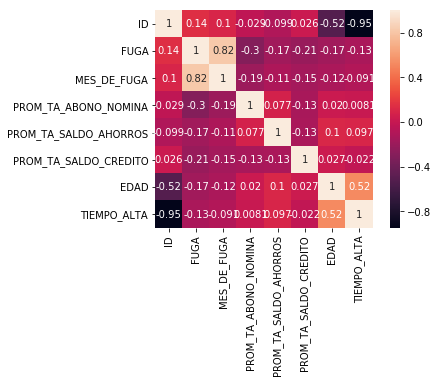

In [53]:
#Identificar correlaciones de la base id mediante un heatmap
sns.heatmap(df_id.corr(), square=True, annot=True)

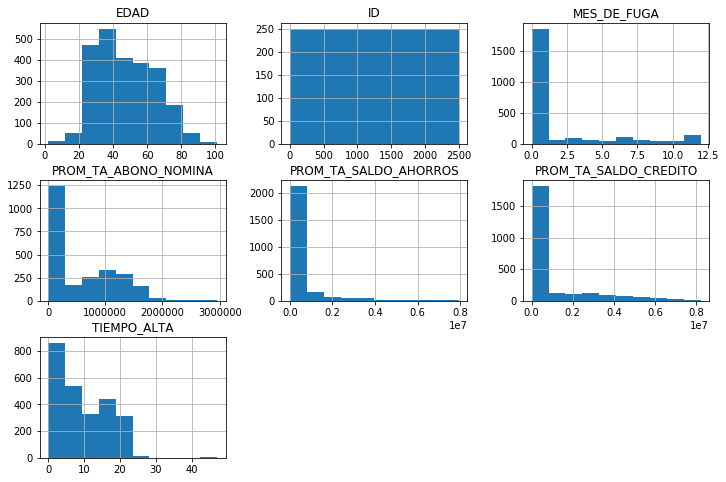

In [55]:
#Histograma de las variables
df_id.drop(['FUGA'],1).hist(figsize=(12, 8))
plt.show()

In [56]:
#Frecuencias según la variable SEXO
df_id['SEXO'].value_counts()

FEMENINO     1250
MASCULINO    1250
Name: SEXO, dtype: int64

Text(0, 0.5, '')

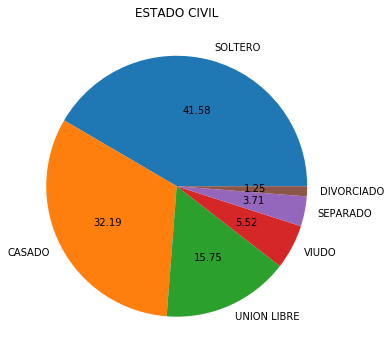

In [57]:
#Diagrama de pastel de la variable ESTADO CVIL
df_id['ESTADO_CIVIL'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(6, 6))
plt.title('ESTADO CIVIL')
plt.ylabel('')

In [58]:
#Frecuencias según la variable ESTADO CIVIL
df_id['ESTADO_CIVIL'].value_counts()

SOLTERO        1032
CASADO          799
UNION LIBRE     391
VIUDO           137
SEPARADO         92
DIVORCIADO       31
Name: ESTADO_CIVIL, dtype: int64

Text(0, 0.5, '')

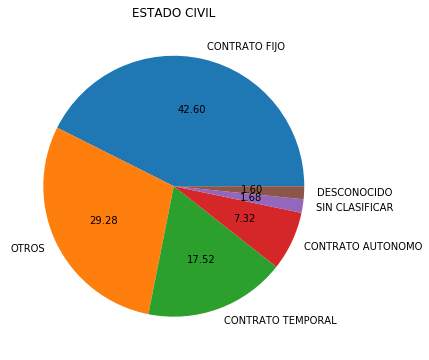

In [59]:
#Diagrama de pastel de la variable SITUACION LABORAL
df_id['SITUACION_LABORAL'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(6, 6))
plt.title('ESTADO CIVIL')
plt.ylabel('')

In [60]:
#Frecuencias según la variable SITUACION LABORAL
df_id['SITUACION_LABORAL'].value_counts()

CONTRATO FIJO        1065
OTROS                 732
CONTRATO TEMPORAL     438
CONTRATO AUTONOMO     183
SIN CLASIFICAR         42
DESCONOCIDO            40
Name: SITUACION_LABORAL, dtype: int64

In [61]:
#Tabla de contingencia entre FUGA y SEXO
df_sexo=pd.crosstab(index=df_id['FUGA'],
            columns=df_id['SEXO'], margins=True)
df_sexo

SEXO,FEMENINO,MASCULINO,All
FUGA,,,
False,903,875,1778
True,347,375,722
All,1250,1250,2500


In [62]:
#Tabla de contingencia entre FUGA y ESTADO CIVIL
df_civil=pd.crosstab(index=df_id['FUGA'],
            columns=df_id['ESTADO_CIVIL'], margins=True)
df_civil

ESTADO_CIVIL,CASADO,DIVORCIADO,SEPARADO,SOLTERO,UNION LIBRE,VIUDO,All
FUGA,,,,,,,
False,604,21,70,688,267,111,1761
True,195,10,22,344,124,26,721
All,799,31,92,1032,391,137,2482


In [63]:
#Tabla de contingencia entre FUGA y SITUACION
df_cont=pd.crosstab(index=df_id['FUGA'],
            columns=df_id['SITUACION_LABORAL'], margins=True)
df_cont

SITUACION_LABORAL,CONTRATO AUTONOMO,CONTRATO FIJO,CONTRATO TEMPORAL,DESCONOCIDO,OTROS,SIN CLASIFICAR,All
FUGA,,,,,,,
False,120,726,262,32,600,38,1778
True,63,339,176,8,132,4,722
All,183,1065,438,40,732,42,2500


In [64]:
#Tabla de contingencia entre FUGA y SEXO expresado como porcentaje relativo total
pd.crosstab(index=df_id['FUGA'],columns=df_id['SEXO'], margins=True).apply(lambda r: r/len(df_id) *100,axis=1)

SEXO,FEMENINO,MASCULINO,All
FUGA,,,
False,36.12,35.0,71.12
True,13.88,15.0,28.88
All,50.00,50.0,100.00


In [65]:
#Tabla de contingencia entre FUGA y ESTADO CIVIL expresado como porcentaje relativo total
pd.crosstab(index=df_id['FUGA'],columns=df_id['ESTADO_CIVIL'], margins=True).apply(lambda r: r/len(df_id) *100,axis=1)

ESTADO_CIVIL,CASADO,DIVORCIADO,SEPARADO,SOLTERO,UNION LIBRE,VIUDO,All
FUGA,,,,,,,
False,24.16,0.84,2.80,27.52,10.68,4.44,70.44
True,7.80,0.40,0.88,13.76,4.96,1.04,28.84
All,31.96,1.24,3.68,41.28,15.64,5.48,99.28


In [66]:
#Tabla de contingencia entre FUGA y SITUACION LABORAL expresado como porcentaje relativo total
pd.crosstab(index=df_id['FUGA'],columns=df_id['SITUACION_LABORAL'], margins=True).apply(lambda r: r/len(df_id) *100,axis=1)

SITUACION_LABORAL,CONTRATO AUTONOMO,CONTRATO FIJO,CONTRATO TEMPORAL,DESCONOCIDO,OTROS,SIN CLASIFICAR,All
FUGA,,,,,,,
False,4.80,29.04,10.48,1.28,24.00,1.52,71.12
True,2.52,13.56,7.04,0.32,5.28,0.16,28.88
All,7.32,42.60,17.52,1.60,29.28,1.68,100.00


In [67]:
#Tabla de contingencia en porcentaje relativo según sexo
pd.crosstab(index=df_id['FUGA'],columns=df_id['SEXO']).apply(lambda r: r/r.sum() *100,axis=1)

SEXO,FEMENINO,MASCULINO
FUGA,,
False,50.787402,49.212598
True,48.060942,51.939058


In [68]:
#Tabla de contingencia en porcentaje relativo según estado civil
pd.crosstab(index=df_id['FUGA'],columns=df_id['ESTADO_CIVIL']).apply(lambda r: r/r.sum() *100,axis=1)     

ESTADO_CIVIL,CASADO,DIVORCIADO,SEPARADO,SOLTERO,UNION LIBRE,VIUDO
FUGA,,,,,,
False,34.298694,1.192504,3.975014,39.068711,15.161840,6.303237
True,27.045770,1.386963,3.051318,47.711512,17.198336,3.606103


In [69]:
#Tabla de contingencia en porcentaje relativo según situacion laboral
pd.crosstab(index=df_id['FUGA'],columns=df_id['SITUACION_LABORAL']).apply(lambda r: r/r.sum() *100,axis=1)                                

SITUACION_LABORAL,CONTRATO AUTONOMO,CONTRATO FIJO,CONTRATO TEMPORAL,DESCONOCIDO,OTROS,SIN CLASIFICAR
FUGA,,,,,,
False,6.749156,40.832396,14.735658,1.799775,33.745782,2.137233
True,8.725762,46.952909,24.376731,1.108033,18.282548,0.554017


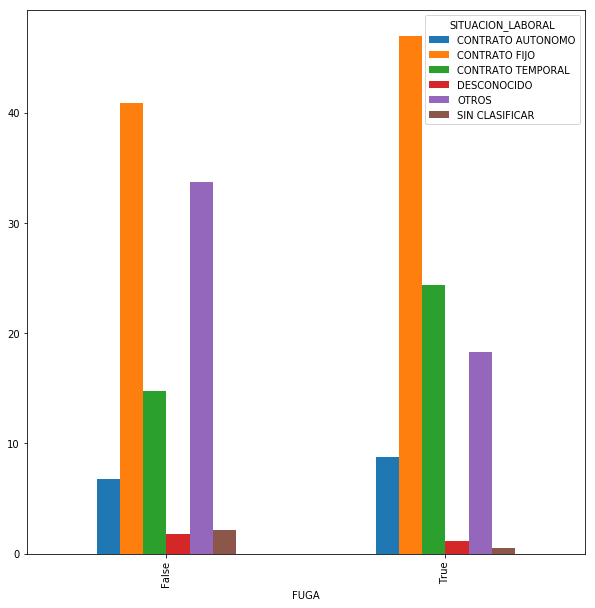

In [70]:
# Gráfico de barras de fuga segun situación laboral
pd.crosstab(index=df_id['FUGA'],columns=df_id['SITUACION_LABORAL']
                  ).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar',figsize=(10,10))

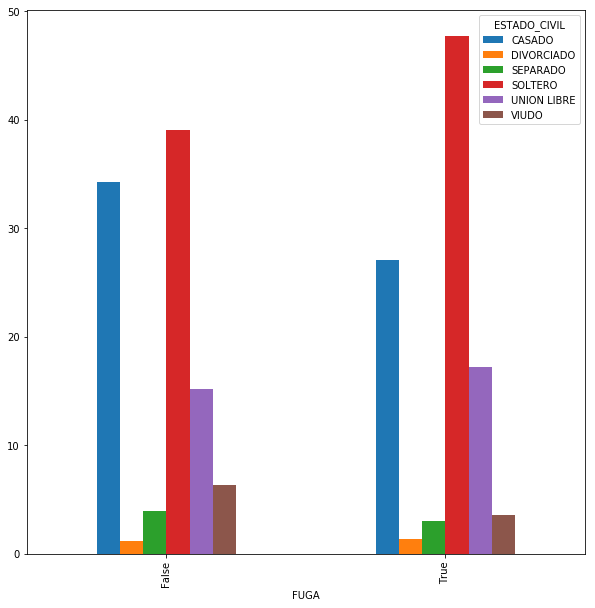

In [71]:
# Gráfico de barras de fuga segun estado civil
pd.crosstab(index=df_id['FUGA'],columns=df_id['ESTADO_CIVIL']
                  ).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar',figsize=(10,10))

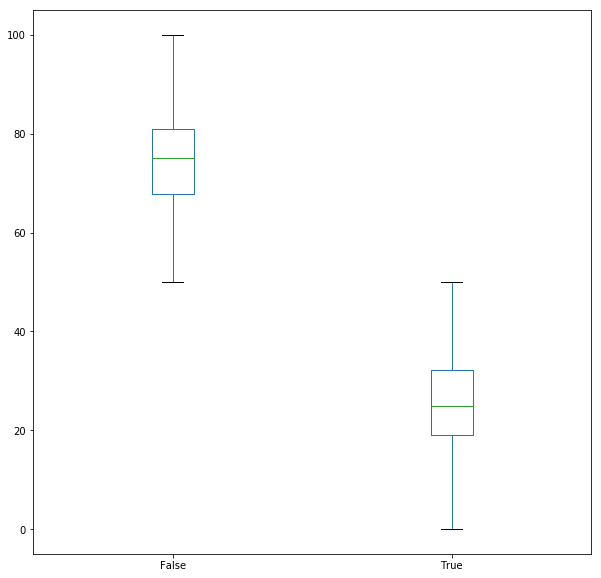

In [72]:
# Box plot de fuga segun tiempo alta
pd.crosstab(columns=df_id['FUGA'],index=df_id['TIEMPO_ALTA']
                  ).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='box',figsize=(10,10))

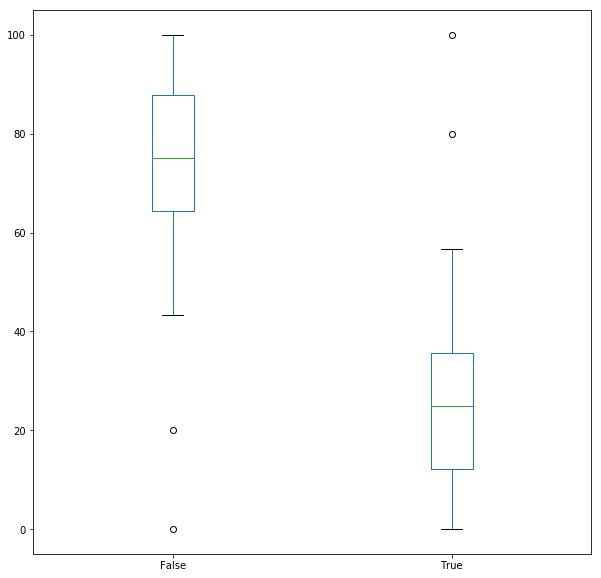

In [73]:
# Box plot de fuga segun edad
pd.crosstab(columns=df_id['FUGA'],index=df_id['EDAD']
                  ).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='box',figsize=(10,10))

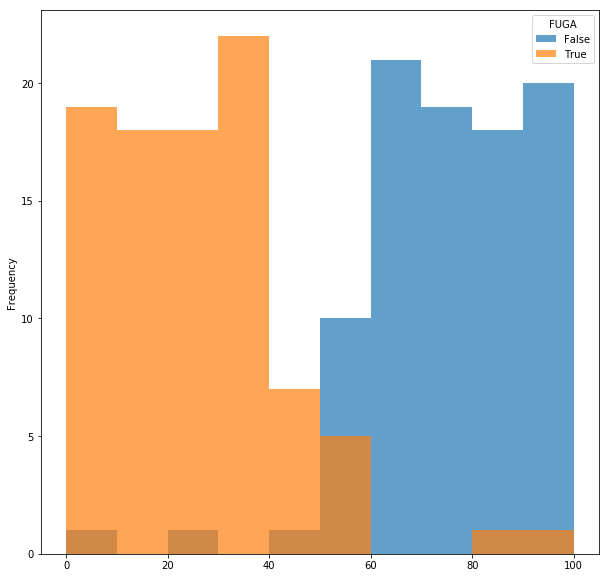

In [74]:
#Histograma de fuga según la edad
pd.crosstab(columns=df_id['FUGA'],index=df_id['EDAD']
                  ).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='hist',figsize=(10,10),alpha=0.7)

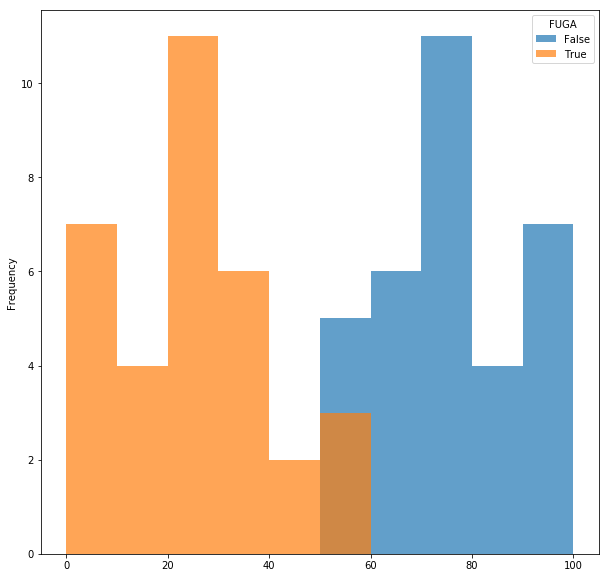

In [75]:
#Histograma de fuga según tiempo alta
pd.crosstab(columns=df_id['FUGA'],index=df_id['TIEMPO_ALTA']
                  ).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='hist',figsize=(10,10),alpha=0.7)

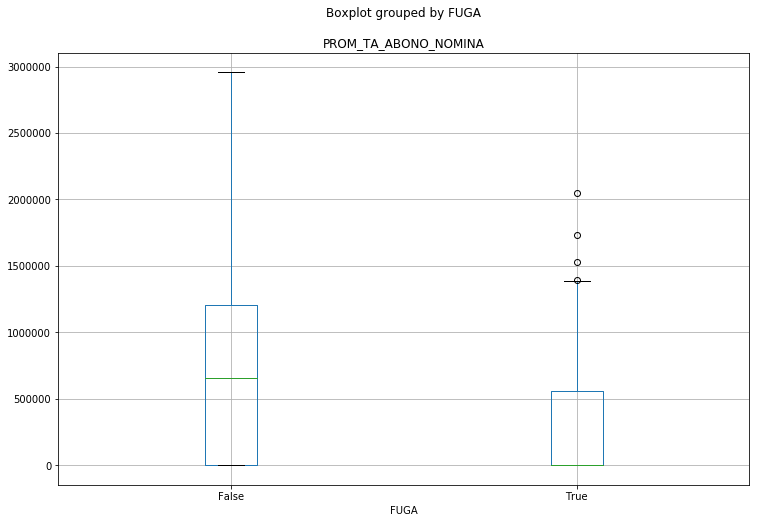

In [76]:
# Box plot de fuga segun prom abono nomina
df_id.boxplot('PROM_TA_ABONO_NOMINA', by='FUGA', figsize=(12, 8))

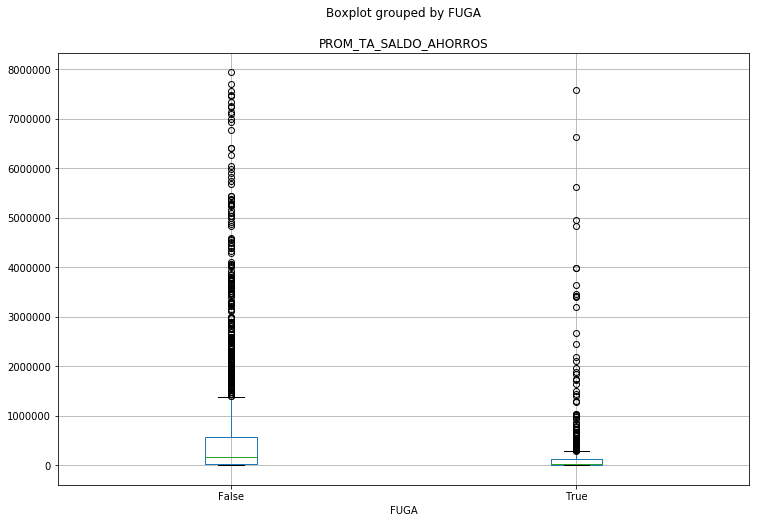

In [77]:
# Box plot de fuga segun prom saldo ahorros
df_id.boxplot('PROM_TA_SALDO_AHORROS', by='FUGA', figsize=(12, 8))

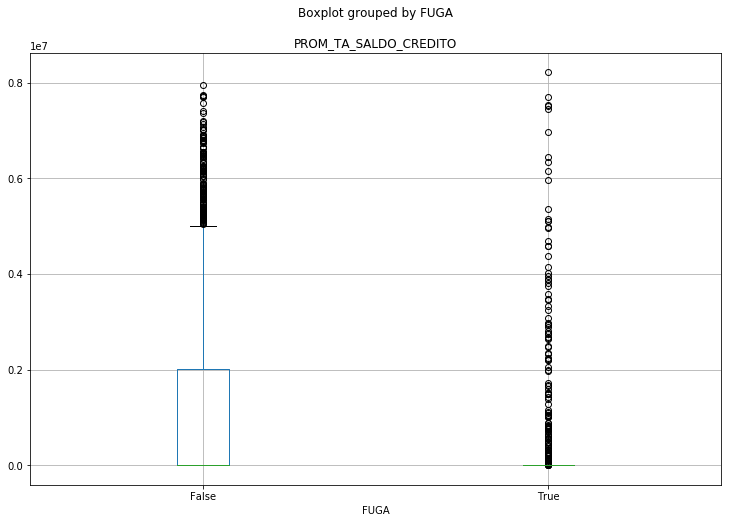

In [106]:
# Box plot de fuga segun prom saldo creditos
df_id.boxplot('PROM_TA_SALDO_CREDITO', by='FUGA', figsize=(12, 8))

<b>8. Evaluation</b>

Determinar la calidad del modelo realizado

<b>ANOVA</b>

In [79]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [80]:
mod = ols('EDAD ~ FUGA',
                data=df_id).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq      df          F        PR(>F)
FUGA       21029.297455     1.0  72.241032  3.233443e-17
Residual  723381.193096  2485.0        NaN           NaN


In [81]:
mod = ols('TIEMPO_ALTA ~ FUGA',
                data=df_id).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df          F        PR(>F)
FUGA        1866.47223     1.0  41.871763  1.168858e-10
Residual  111350.63937  2498.0        NaN           NaN


In [82]:
mod = ols('PROM_TA_SALDO_CREDITO ~ FUGA',
                data=df_id).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df           F        PR(>F)
FUGA      3.476210e+14     1.0  114.617464  3.495827e-26
Residual  7.576135e+15  2498.0         NaN           NaN


In [83]:
mod = ols('PROM_TA_SALDO_AHORROS ~ FUGA',
                data=df_id).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df          F        PR(>F)
FUGA      8.064095e+13     1.0  73.755441  1.530091e-17
Residual  2.731203e+15  2498.0        NaN           NaN


In [84]:
mod = ols('PROM_TA_ABONO_NOMINA ~ FUGA',
                data=df_id).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df         F        PR(>F)
FUGA      7.956704e+13     1.0  239.1705  1.360004e-51
Residual  8.310326e+14  2498.0       NaN           NaN


In [85]:
df_id.describe()

,ID,MES_DE_FUGA,PROM_TA_ABONO_NOMINA,PROM_TA_SALDO_AHORROS,PROM_TA_SALDO_CREDITO,EDAD,TIEMPO_ALTA
count,2500.00000,2500.000000,2.500000e+03,2.500000e+03,2.500000e+03,2487.000000,2500.000000
mean,1250.50000,1.802000,5.472798e+05,4.896924e+05,9.623751e+05,47.365099,9.275600
std,721.83216,3.435858,6.036436e+05,1.060749e+06,1.780666e+06,17.304366,6.730896
min,1.00000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,0.000000
25%,625.75000,0.000000,0.000000e+00,5.391555e+03,0.000000e+00,33.000000,3.000000
50%,1250.50000,0.000000,3.308482e+05,1.027709e+05,0.000000e+00,46.000000,8.000000
75%,1875.25000,2.000000,1.064586e+06,4.266367e+05,1.175199e+06,61.000000,15.000000
max,2500.00000,12.000000,2.955846e+06,7.937737e+06,8.215469e+06,101.000000,47.000000


In [86]:
df_true=df_id.query('FUGA==True')

In [87]:
df_true.mean()

ID                         1411.641274
FUGA                          1.000000
MES_DE_FUGA                   6.239612
PROM_TA_ABONO_NOMINA     267321.186746
PROM_TA_SALDO_AHORROS    207850.768646
PROM_TA_SALDO_CREDITO    377207.495323
EDAD                         42.814147
TIEMPO_ALTA                   7.919668
dtype: float64

In [88]:
df_false=df_id.query('FUGA==False')

In [89]:
df_false.mean()

ID                       1.185065e+03
FUGA                     0.000000e+00
MES_DE_FUGA              0.000000e+00
PROM_TA_ABONO_NOMINA     6.609638e+05
PROM_TA_SALDO_AHORROS    6.041410e+05
PROM_TA_SALDO_CREDITO    1.199997e+06
EDAD                     4.922310e+01
TIEMPO_ALTA              9.826209e+00
dtype: float64

<b> ÁRBOL DE DECISIONES</b>

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

In [91]:
#Directorio
os.chdir("C://Users/hecansaga/Desktop/YPD")

In [92]:
#Limpiar de datos missing
df_idc = df_id.dropna()

In [93]:
#Definir variables predictoras y objetivo
predictors = df_idc[['EDAD','TIEMPO_ALTA','PROM_TA_ABONO_NOMINA','PROM_TA_SALDO_AHORROS','PROM_TA_SALDO_CREDITO']]
targets = df_idc.FUGA

In [94]:
#Muestra de entrenamiento y de test con un test del 40%
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.2)

In [95]:
#tamaño muestra predictora train
pred_train.shape

(1984, 5)

In [96]:
#tamaño muestra predictora test
pred_test.shape

(497, 5)

In [97]:
#tamaño muestra objetivo train
tar_train.shape

(1984,)

In [98]:
#tamaño muestra objetivo test
tar_test.shape

(497,)

In [99]:
#Árbol
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)

In [100]:
#Predicciones
predictions=classifier.predict(pred_test)

In [101]:
#Matriz de confusión de predicciones
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[271,  90],
       [ 57,  79]], dtype=int64)

In [102]:
#Indice de precision
sklearn.metrics.accuracy_score(tar_test, predictions)

0.704225352112676

In [103]:
#Librerías para exportar arbol
from sklearn import tree
from io import StringIO
from IPython.display import Image

In [104]:
#Exportar arbol
out = StringIO()
tree.export_graphviz(classifier, out_file='treeYPD.dot')

In [105]:
#Librerías para regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn import metrics